In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load sales data from different formats
# Load CSV
csv_file = "sales_data_sample.csv"
df_csv = pd.read_csv(csv_file, sep=",", encoding='Latin-1')

In [4]:
# Check the first few rows of the CSV file
print(df_csv.head(5))

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [5]:
# Explore the structure of the CSV data
df_csv.describe()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
# Check for missing values
df_csv.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [7]:
# Data Cleaning Operations:
# Handle missing values - filling or dropping
df_csv['ADDRESSLINE2'].fillna('Not Provided', inplace=True)  # Filling missing address info
df_csv.dropna(subset=['STATE', 'POSTALCODE'], inplace=True)  # Drop rows with missing state or postalcode


In [8]:
# Drop duplicates
df_csv.drop_duplicates(inplace=True)

In [9]:
# Convert 'ORDERDATE' to datetime type
df_csv['ORDERDATE'] = pd.to_datetime(df_csv['ORDERDATE'], errors='coerce')

In [10]:
# Create a new column 'Location' combining 'CITY' and 'COUNTRY'
df_csv['Location'] = df_csv['CITY'] + ',' + df_csv['COUNTRY']

In [11]:
# Drop columns that are not needed for analysis
df_csv = df_csv.drop(columns=['COUNTRY', 'CITY'])

In [12]:
# Convert relevant columns to categorical types for optimization
categorical_columns = ['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'Location']
for col in categorical_columns:
    df_csv[col] = df_csv[col].astype('category')

In [13]:
# Perform Data Transformation:
# Example: Add a new column for Total Order Value (QUANTITYORDERED * PRICEEACH)
df_csv['TotalOrderValue'] = df_csv['QUANTITYORDERED'] * df_csv['PRICEEACH']

In [14]:
# Aggregate data by Year and Month for analysis
monthly_sales = df_csv.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].sum().reset_index()


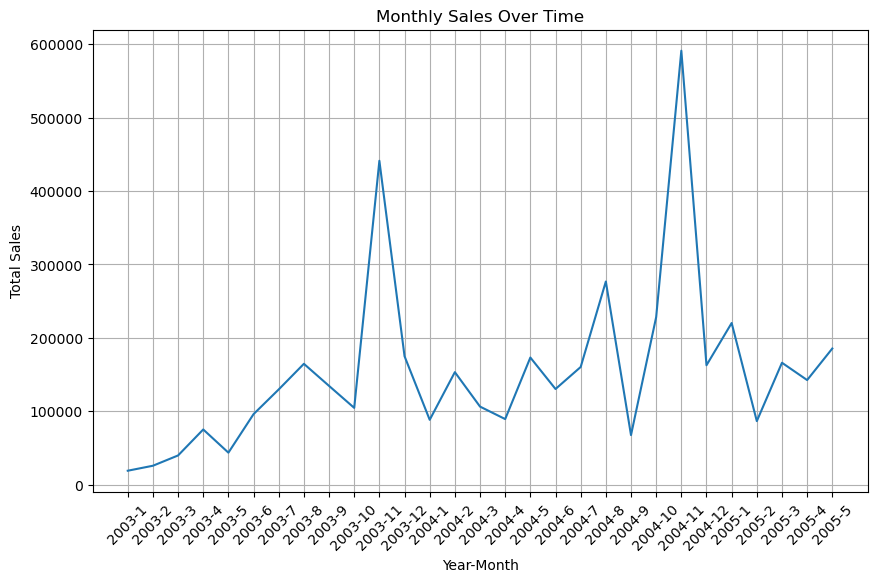

In [15]:
# Plotting the sales data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YEAR_ID'].astype(str) + '-' + monthly_sales['MONTH_ID'].astype(str), monthly_sales['SALES'])
plt.xticks(rotation=45)
plt.title('Monthly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

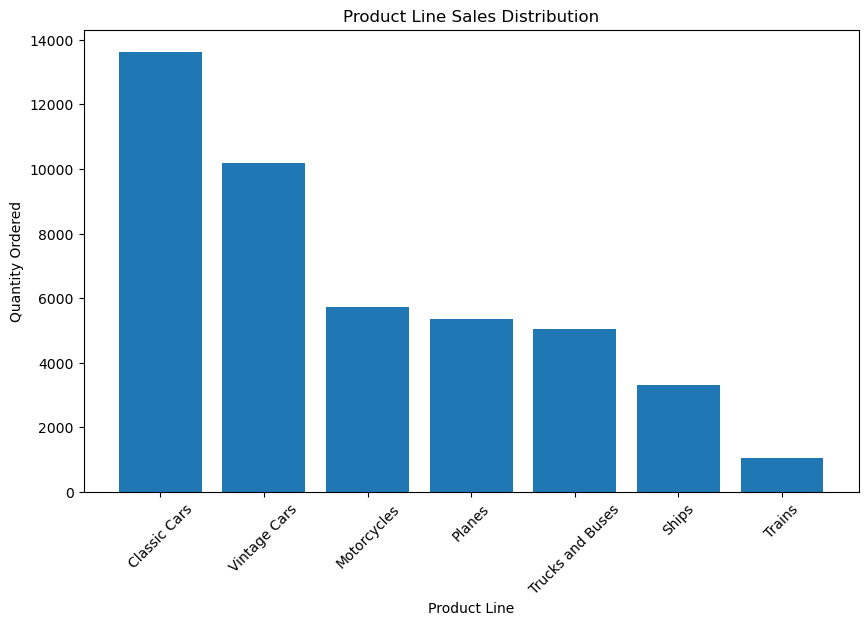

In [16]:
# Analyzing the quantity of orders by product line
product_sales = df_csv.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().reset_index()
product_sales.sort_values(by='QUANTITYORDERED', ascending=False, inplace=True)

# Plotting product sales distribution
plt.figure(figsize=(10, 6))
plt.bar(product_sales['PRODUCTLINE'], product_sales['QUANTITYORDERED'])
plt.title('Product Line Sales Distribution')
plt.xlabel('Product Line')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Descriptive statistics for the cleaned data
print(df_csv.describe())

# Checking unique values in categorical columns for further exploration
print(df_csv[categorical_columns].nunique())

        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   1261.000000      1261.000000  1261.000000      1261.000000   
mean   10262.626487        35.127676    83.745852         6.432197   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10192.000000        27.000000    69.280000         3.000000   
50%    10265.000000        34.000000    96.110000         6.000000   
75%    10335.000000        43.000000   100.000000         9.000000   
max    10422.000000        85.000000   100.000000        18.000000   
std       88.458138         9.825964    20.253642         4.163089   

              SALES                      ORDERDATE       QTR_ID     MONTH_ID  \
count   1261.000000                           1261  1261.000000  1261.000000   
mean    3550.107851  2004-05-26 00:05:42.585249792     2.773989     7.281523   
min      541.140000            2003-01-06 00:00:00     1.000000     1.000000   
25%     2241.450000            2003-11-20 00:00:0